In [2]:
import pandas as pd

data = pd.read_csv('/kaggle/input/social-media-usage-trends-india/Social Media Usage India.csv')
data.head()

,Age,City,Current Status,Do you own multiple profiles on Instagram?,Gender,Highest Education,Location (City Airport Code),Phone OS,State,Zone,...,Time Spent on Instagram in last week (in minutes),Time Spent on Instagram in last weekend (in minutes),Time Spent on WhatsApp in last week (in minutes),Time Spent on WhatsApp in last weekend (in minutes),Total Facebook Usage,Total Instagram Usage,Total Social Media Usage,Total Week Usage,Total Weekend Usage,Total WhatsApp Usage
0,24,Delhi,Working professional,No,Female,Graduation,DEL,iOs,Delhi,Northern,...,770,400,900,120,0,"1,170","2,190","1,670",520,"1,020"
1,39,Delhi,Working professional,No,Female,Post graduation,DEL,iOs,Delhi,Northern,...,0,0,"5,000","2,000","8,160",0,"15,160","11,000","4,160","7,000"
2,22,Mumbai,Working professional,No,Male,Graduation,BOM,Android,Maharashtra,Western,...,"1,000","1,000","7,000","2,000","2,500","2,000","13,500","8,500","5,000","9,000"
3,26,Bengaluru,Sabbatical,Yes,Female,Graduation,BLR,Android,Karnataka,Southern,...,"2,000","2,000","1,680","1,680","3,000","4,000","10,360","5,180","5,180","3,360"
4,50,Delhi,Working professional,No,Male,Graduation,DEL,iOs,Delhi,Northern,...,0,0,"2,400","1,300","3,000",0,"6,700","3,900","2,800","3,700"


In [3]:
data.columns

Index(['Age', 'City', 'Current Status',
       'Do you own multiple profiles on Instagram?', 'Gender',
       'Highest Education', 'Location (City Airport Code)', 'Phone OS',
       'State', 'Zone',
       'How many followers do you have on Instagram? (In case of multiple accounts, please mention the one with the maximum)',
       'How many posts do you have on Instagram?', 'Latitude', 'Longitude',
       'Time Spent on Facebook in last week (in minutes)',
       'Time Spent on Facebook in last weekend (in minutes)',
       'Time Spent on Instagram in last week (in minutes)',
       'Time Spent on Instagram in last weekend (in minutes)',
       'Time Spent on WhatsApp in last week (in minutes)',
       'Time Spent on WhatsApp in last weekend (in minutes)',
       'Total Facebook Usage', 'Total Instagram Usage',
       'Total Social Media Usage', 'Total Week Usage', 'Total Weekend Usage',
       'Total WhatsApp Usage'],
      dtype='object')

In [4]:
# Rename the large column names
data = data.rename(columns={
    'How many followers do you have on Instagram? (In case of multiple accounts, please mention the one with the maximum)':'Instagram Followers',
    'How many posts do you have on Instagram?':'Instagram Posts'
})
data.columns

Index(['Age', 'City', 'Current Status',
       'Do you own multiple profiles on Instagram?', 'Gender',
       'Highest Education', 'Location (City Airport Code)', 'Phone OS',
       'State', 'Zone', 'Instagram Followers', 'Instagram Posts', 'Latitude',
       'Longitude', 'Time Spent on Facebook in last week (in minutes)',
       'Time Spent on Facebook in last weekend (in minutes)',
       'Time Spent on Instagram in last week (in minutes)',
       'Time Spent on Instagram in last weekend (in minutes)',
       'Time Spent on WhatsApp in last week (in minutes)',
       'Time Spent on WhatsApp in last weekend (in minutes)',
       'Total Facebook Usage', 'Total Instagram Usage',
       'Total Social Media Usage', 'Total Week Usage', 'Total Weekend Usage',
       'Total WhatsApp Usage'],
      dtype='object')

In [5]:
# Primary Analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 26 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Age                                                   1628 non-null   int64  
 1   City                                                  1628 non-null   object 
 2   Current Status                                        1628 non-null   object 
 3   Do you own multiple profiles on Instagram?            1628 non-null   object 
 4   Gender                                                1628 non-null   object 
 5   Highest Education                                     1628 non-null   object 
 6   Location (City Airport Code)                          1628 non-null   object 
 7   Phone OS                                              1628 non-null   object 
 8   State                                                 1628

In [6]:
data.shape

(1628, 26)

In [7]:
# Sample Row
data.loc[0]

Age                                                                       24
City                                                                   Delhi
Current Status                                          Working professional
Do you own multiple profiles on Instagram?                                No
Gender                                                                Female
Highest Education                                                 Graduation
Location (City Airport Code)                                             DEL
Phone OS                                                                 iOs
State                                                                  Delhi
Zone                                                                Northern
Instagram Followers                                                      456
Instagram Posts                                                           20
Latitude                                                           28.651952

In [8]:
data['Current Status'].value_counts()

Working professional    796
Student                 637
Sabbatical              190
Self Employed             5
Name: Current Status, dtype: int64

In [9]:
# Since maximum of numerical columns are Object, Below is a function to convert object to numeric
def convert_to_num(x):
    x = x.replace(',','')
    return pd.to_numeric(x)

<b>From our experience, we see that people tend to be online more often on the weekend than on the weekdays. The reason being obvious, that they are busy in schools or work.</b>
<br>
<i><u>My Hypothesis</u><br/>
    <b>Total Social Media usage on the weekend is more than that on weekdays</b></i>

In [10]:
data_c = data[data['Current Status']=='Working professional']
data_c = data[['Total Week Usage','Total Weekend Usage']].applymap(convert_to_num)

Let's use a Histogram to visualize

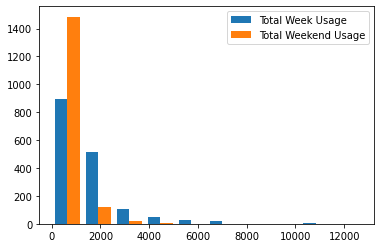

In [11]:
import matplotlib.pyplot as plt

plt.hist([data_c['Total Week Usage'], data_c['Total Weekend Usage']],label=['Total Week Usage','Total Weekend Usage'])
plt.legend(loc='upper right')
plt.show()

<p>The Histogram gives a good look at the Weekend Usage vs Weekly Usage and it seems our hypothesis is correct.</p>
<p>Let's use a Probability Mass Function to Visualize and be sure about our claim.</p>

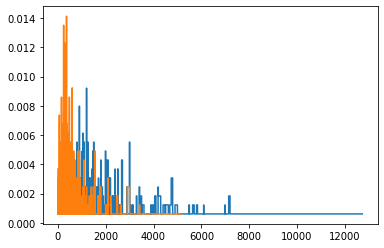

In [12]:
# A Probability Mass Function would be more efficient

from collections import OrderedDict

def pmf(seq):
    freq_dict = {}
    for i in seq:
        if i in freq_dict:
            freq_dict[i]+=1
        else:
            freq_dict[i]=1
    N = len(seq)
    pmf_dict={}
    for k,v in freq_dict.items():
        pmf_dict[k]=v/N
    return pmf_dict

pmf_week_usage = pmf(data_c['Total Week Usage'])
pmf_weekend_usage = pmf(data_c['Total Weekend Usage'])

pmf_week_usage_sorted = OrderedDict(sorted(pmf_week_usage.items()))
pmf_weekend_usage_sorted = OrderedDict(sorted(pmf_weekend_usage.items()))

plt.step(list(pmf_week_usage_sorted.keys()),list(pmf_week_usage_sorted.values()), label="Total Week Usage")
plt.step(list(pmf_weekend_usage_sorted.keys()),list(pmf_weekend_usage_sorted.values()), label="Total Weekend Usage")

<i><u>Conclusion</u></i><br/><b>It looks like our Hypothesis is True. From the PMF we can be sure that there are more of Weekend Usage than Weekly Usage</b>

<p><b>Let us now analyze the Instagram and Facebook Usage.</b></p>
<i><u>My Hypothesis</u><br/><b>My friends have been telling me that people are shifting to Instagram from Facebook as a new trend.Let's check that out</b></i>

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

{'bodies': [<matplotlib.collections.PolyCollection at 0x7ba9efe183d0>,
 'cmeans': <matplotlib.collections.LineCollection at 0x7ba9efe5a950>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7ba9efe18c10>,
 'cmins': <matplotlib.collections.LineCollection at 0x7ba9efe314d0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7ba9efe18250>}

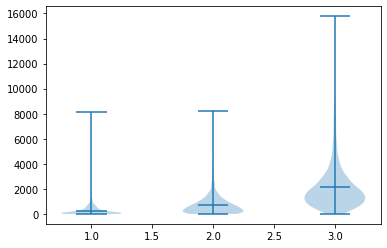

In [13]:
# Get the appropriate data in a seperate frame
data_c = data[['Total Facebook Usage', 'Total Instagram Usage', 'Total Social Media Usage']]
data_c['Total Facebook Usage'] = data_c['Total Facebook Usage'].map(convert_to_num)
data_c['Total Instagram Usage'] = data_c['Total Instagram Usage'].map(convert_to_num)
data_c['Total Social Media Usage'] = data_c['Total Social Media Usage'].map(convert_to_num)
plt.violinplot(data_c, showmeans=True)

<p>Looks like there are more users of Instagram than Facebook. To be more sure let us get rid of the Non Facebook and Instagram users, i.e. users who have 0 usage for Facebook or Instagram.</p>

In [14]:
data_c.shape

(1628, 3)

In [15]:
# Let's get rid of data where facebook usage and/or Instagram usage is 0
data_c = data_c[(data_c['Total Facebook Usage']>0)&(data_c['Total Instagram Usage']>0)]
data_c.shape

(1147, 3)

{'whiskers': [<matplotlib.lines.Line2D at 0x7ba9edabc210>,
 'caps': [<matplotlib.lines.Line2D at 0x7ba9edabcad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ba9edb31f10>,
 'medians': [<matplotlib.lines.Line2D at 0x7ba9edac73d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ba9edac7c50>,
 'means': [<matplotlib.lines.Line2D at 0x7ba9edac7810>,
  <matplotlib.lines.Line2D at 0x7ba9edaf0e90>]}

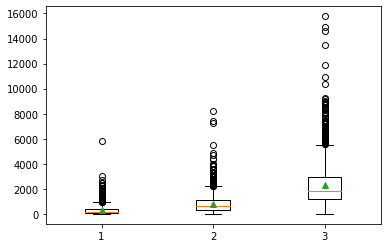

In [16]:
plt.boxplot(data_c, showmeans=True)

<i><u>Conclusion</u></i><br>
<b>Looking at both the Box Plot and Violin Plot, we can now be sure that people are indeed shifting to Instagram from facebook</b>

<b>Now let us have a analysis amongst Facebook Users, Instagram Users and if and how they relate to the number of Instagram Followers.</b>

In [17]:
# Let's take the complete data
data_c = data[['Age', 'City', 'Current Status',
       'Do you own multiple profiles on Instagram?', 'Gender',
       'Highest Education', 'Location (City Airport Code)', 'Phone OS',
       'State', 'Zone','Instagram Followers','Total Facebook Usage', 'Total Instagram Usage', 'Total Social Media Usage']]
data_c['Total Facebook Usage'] = data_c['Total Facebook Usage'].map(convert_to_num)
data_c['Total Instagram Usage'] = data_c['Total Instagram Usage'].map(convert_to_num)
data_c['Instagram Followers'] = data_c['Instagram Followers'].map(convert_to_num)
data_c['Total Social Media Usage'] = data_c['Total Social Media Usage'].map(convert_to_num)
data_c.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,Age,City,Current Status,Do you own multiple profiles on Instagram?,Gender,Highest Education,Location (City Airport Code),Phone OS,State,Zone,Instagram Followers,Total Facebook Usage,Total Instagram Usage,Total Social Media Usage
0,24,Delhi,Working professional,No,Female,Graduation,DEL,iOs,Delhi,Northern,456,0,1170,2190.0
1,39,Delhi,Working professional,No,Female,Post graduation,DEL,iOs,Delhi,Northern,0,8160,0,15160.0
2,22,Mumbai,Working professional,No,Male,Graduation,BOM,Android,Maharashtra,Western,400,2500,2000,13500.0
3,26,Bengaluru,Sabbatical,Yes,Female,Graduation,BLR,Android,Karnataka,Southern,485,3000,4000,10360.0
4,50,Delhi,Working professional,No,Male,Graduation,DEL,iOs,Delhi,Northern,0,3000,0,6700.0


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


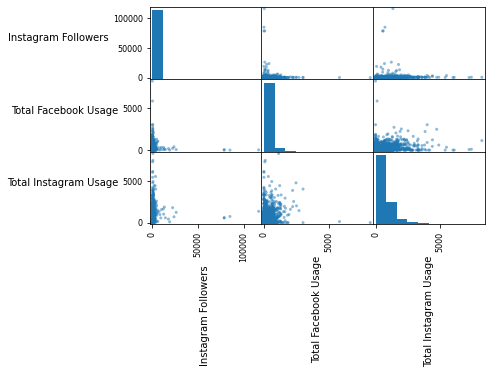

In [18]:
axes = pd.plotting.scatter_matrix(data_c[['Instagram Followers','Total Facebook Usage', 'Total Instagram Usage']])
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

In [19]:
data_c[['Instagram Followers','Total Facebook Usage', 'Total Instagram Usage']].corr()

,Instagram Followers,Total Facebook Usage,Total Instagram Usage
Instagram Followers,1.000000,-0.029036,0.055666
Total Facebook Usage,-0.029036,1.000000,0.162187
Total Instagram Usage,0.055666,0.162187,1.000000


<b>Although the Scatter Matrix did not tell us much. We can see from the Correlation Matrix that number of Instagram Followers are negatively correlated with Facebook Usage. Hence, we can say that,<i> more the number of Instagram Followers people get, the less they visit Facebook!</i><br>It is also intuitive and validated from the Correlation Matrix that more Instagram Followers leads to more Instagram Usage and vice-versa.<b>

<b>We see that parents scold their kids when they visit Social Media very often and ask them to concentrate on studies as Social Media might distract them. Let us validate their claims!<br/></b><i><u>My Hypothesis</u><br/><b>People with more degrees tend to have less Total Social Network Usage</b></i>

<BarContainer object of 1628 artists>

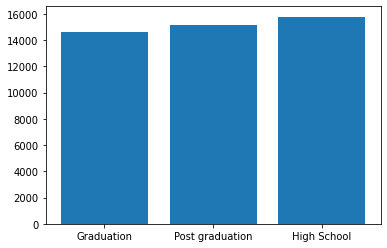

In [20]:
plt.bar(data_c['Highest Education'],data_c['Total Social Media Usage'])

<i><u>Conclusion</u></i><br><b>Now we have a conclusive proof that our asumption might not be correct! We see that poeple with Post Graduate degrees tend to use social media more than people having Graduation degrees only.<br/>Can this be due to the fact that people with Graduation tend to get into industrial jobs than people with Post Graduation degrees as people with PG degrees tend to get into academics and go for further studies?!</b><br> Let's verify this.<br><br><p><i><u>My Hypothesis</u><br><b>People in Working Profession tend to visit Social Media less than others</b></i>

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

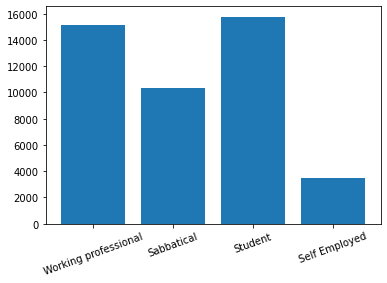

In [21]:
plt.bar(data_c['Current Status'],data_c['Total Social Media Usage'])
plt.xticks(rotation=20)

<i><u>Conclusion</u></i><br><b>We see from the bar chart that although Working Professionals visit social media less than Students (Intuitve!), but it is not always true that Working Professionals tend to visit Social Media less than other people. We can see that people who have taken Sabbatical visit social media less than Students and Working Professionals. People who are Self Employed are lesser. We can interpret and infer various reasons for this!</b>

<b>Let us go back to our Instagram Analogy. We saw the rise and shift of Instagram from Facebook. Can we also say that Working Professional are shifting to Instagram lesser than others.</b><p><i><u>Hypothesis</u><br><b>Working Professionals are not shifting to Instagram as much as others.</b>

In [22]:
# Let's create a column which has the difference between Instagram usage and Facebook usage
data_c['Insta-FB'] = data_c['Total Instagram Usage'] - data_c['Total Facebook Usage']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

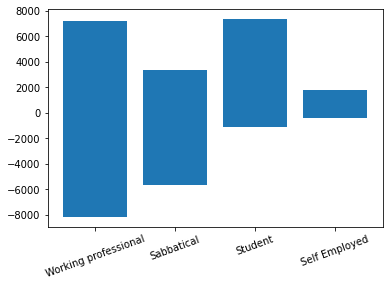

In [23]:
plt.bar(data_c['Current Status'],data_c['Insta-FB'])

plt.xticks(rotation=20)

<i><u>Conclusion</u><br><b>We can see from the bar chart that Working Professionals are using as much Facebook as they are using Instagram. This is also almost true for people with Sabbatical. But we see a clear shift to Instagram for Students. The new generation seems to love Instagram!</b>

<b>Now let us talk about Instagram in more detail. How can one get huge number of followers? Can we say that people tend to follow celebraties and so people living in Metropolitan Cities than Non-Metropolitan Cities?</b> (A bit Stereotypical!)<p>Let's check this out!</p>

In [24]:
set(data_c['City'])

{'Agra',
 'Ahmedabad',
 'Allahabad',
 'Amritsar',
 'Aurangabad',
 'Bagdogra',
 'Baroda',
 'Belgaum',
 'Bengaluru',
 'Bhavnagar',
 'Bhopal',
 'Bhubaneshwar',
 'Bhuj',
 'Chandigarh',
 'Chennai',
 'Coimbatore',
 'Cooch-behar',
 'DehraDun',
 'Delhi',
 'Dibrugarh',
 'Durgapur',
 'Goa',
 'Guwahati',
 'Gwalior',
 'Hyderabad',
 'Indore',
 'Jaipur',
 'Jammu',
 'Jorhat',
 'Kandla',
 'Kanpur',
 'Kochi',
 'Kolkata',
 'Kulu',
 'Lucknow',
 'Ludhiana',
 'Madurai',
 'Mangalore',
 'Mumbai',
 'Nagpur',
 'Nainital',
 'Pathankot',
 'Patna',
 'Pune',
 'Raipur',
 'Rajkot',
 'Ranchi',
 'Surat',
 'Thiruvananthapuram',
 'Tiruchirappalli',
 'Udaipur',
 'Varanasi',
 'Vishakhapatnam'}

In [25]:
metro_city_dict = {'Agra':0,
 'Ahmedabad':1,
 'Allahabad':0,
 'Amritsar':0,
 'Aurangabad':0,
 'Bagdogra':0,
 'Baroda':0,
 'Belgaum':0,
 'Bengaluru':1,
 'Bhavnagar':0,
 'Bhopal':0,
 'Bhubaneshwar':0,
 'Bhuj':0,
 'Chandigarh':0,
 'Chennai':1,
 'Coimbatore':0,
 'Cooch-behar':0,
 'DehraDun':0,
 'Delhi':1,
 'Dibrugarh':0,
 'Durgapur':0,
 'Goa':0,
 'Guwahati':0,
 'Gwalior':0,
 'Hyderabad':1,
 'Indore':0,
 'Jaipur':1,
 'Jammu':0,
 'Jorhat':0,
 'Kandla':0,
 'Kanpur':1,
 'Kochi':0,
 'Kolkata':1,
 'Kulu':0,
 'Lucknow':0,
 'Ludhiana':0,
 'Madurai':1,
 'Mangalore':0,
 'Mumbai':1,
 'Nagpur':1,
 'Nainital':0,
 'Pathankot':0,
 'Patna':1,
 'Pune':1,
 'Raipur':0,
 'Rajkot':0,
 'Ranchi':0,
 'Surat':1,
 'Thiruvananthapuram':0,
 'Tiruchirappalli':0,
 'Udaipur':0,
 'Varanasi':0,
 'Vishakhapatnam':1}
# Based on https://en.wikipedia.org/wiki/List_of_metropolitan_areas_in_India
data_c['Metropolitan'] = data['City'].map(metro_city_dict)
data_c['Metropolitan']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0       1
1       1
2       1
3       1
4       1
       ..
1623    1
1624    1
1625    0
1626    1
1627    1
Name: Metropolitan, Length: 1628, dtype: int64

In [26]:
# Let's take the complete data
data_c = data[['Age', 'City', 'Current Status',
       'Do you own multiple profiles on Instagram?', 'Gender',
       'Highest Education', 'Location (City Airport Code)', 'Phone OS',
       'State', 'Zone','Instagram Followers','Total Facebook Usage', 'Total Instagram Usage', 'Total Social Media Usage']]
data_c['Total Facebook Usage'] = data_c['Total Facebook Usage'].map(convert_to_num)
data_c['Total Instagram Usage'] = data_c['Total Instagram Usage'].map(convert_to_num)
data_c['Instagram Followers'] = data_c['Instagram Followers'].map(convert_to_num)
data_c['Total Social Media Usage'] = data_c['Total Social Media Usage'].map(convert_to_num)
data_c.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,Age,City,Current Status,Do you own multiple profiles on Instagram?,Gender,Highest Education,Location (City Airport Code),Phone OS,State,Zone,Instagram Followers,Total Facebook Usage,Total Instagram Usage,Total Social Media Usage
0,24,Delhi,Working professional,No,Female,Graduation,DEL,iOs,Delhi,Northern,456,0,1170,2190.0
1,39,Delhi,Working professional,No,Female,Post graduation,DEL,iOs,Delhi,Northern,0,8160,0,15160.0
2,22,Mumbai,Working professional,No,Male,Graduation,BOM,Android,Maharashtra,Western,400,2500,2000,13500.0
3,26,Bengaluru,Sabbatical,Yes,Female,Graduation,BLR,Android,Karnataka,Southern,485,3000,4000,10360.0
4,50,Delhi,Working professional,No,Male,Graduation,DEL,iOs,Delhi,Northern,0,3000,0,6700.0


In [27]:
data_c['Metropolitan'] = data['City'].map(metro_city_dict)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
followersByCity = data_c.groupby('City')['Instagram Followers'].mean()
followersByCity

City
Agra                    446.333333
Ahmedabad               670.412844
Allahabad               936.000000
Amritsar                542.800000
Aurangabad              834.000000
Bagdogra                261.105263
Baroda                  462.043478
Belgaum                1117.000000
Bengaluru               675.057471
Bhavnagar               150.000000
Bhopal                 1051.000000
Bhubaneshwar          12627.000000
Bhuj                    692.000000
Chandigarh             1515.064516
Chennai                 743.161290
Coimbatore              180.000000
Cooch-behar              56.000000
DehraDun                485.291667
Delhi                   690.104839
Dibrugarh               259.000000
Durgapur                675.000000
Goa                     977.000000
Guwahati                243.125000
Gwalior                 373.250000
Hyderabad               393.244444
Indore                  390.193548
Jaipur                  485.333333
Jammu                   231.000000
Jorhat         

In [29]:
followersByCityDf = pd.DataFrame(followersByCity)
followersByCityDf

,Instagram Followers
City,
Agra,446.333333
Ahmedabad,670.412844
Allahabad,936.000000
Amritsar,542.800000
Aurangabad,834.000000
Bagdogra,261.105263
Baroda,462.043478
Belgaum,1117.000000
Bengaluru,675.057471


In [30]:
followersByCityDf['Metropolitan'] = followersByCityDf.index.map(metro_city_dict)
followersByCityDf

,Instagram Followers,Metropolitan
City,,
Agra,446.333333,0
Ahmedabad,670.412844,1
Allahabad,936.000000,0
Amritsar,542.800000,0
Aurangabad,834.000000,0
Bagdogra,261.105263,0
Baroda,462.043478,0
Belgaum,1117.000000,0
Bengaluru,675.057471,1


In [31]:
followersByCityDf.groupby('Metropolitan')['Instagram Followers'].mean()

Metropolitan
0    847.248510
1    804.704077
Name: Instagram Followers, dtype: float64

<i><u>Conclusion</u><br><b>We see that our stereotypical claim is not true. Everyone can gather followers by talent irrespective of where they belong.</b>

<b>Let us check the same with respect to Standard Deviation.</b><p>It is up to you to think that less spread can infer more surity on gathering followers. You can analyze more on this!</p>

In [32]:
followersByCityDf.groupby('Metropolitan')['Instagram Followers'].std()

Metropolitan
0    1989.096765
1     853.461774
Name: Instagram Followers, dtype: float64

<i><u>Conclusion</u><br><b>It seems that there is less spread in Metropolitan Cities for Instagram Followers Count</b></i>

<p>Let's check the same for top 10 cities with respect to mean and standard deviation to check for average followers and spread of followers respectvely. <p><p><b>Top 10 Cities based on Mean of Instagram Followers</b>

In [33]:
followersByCitySTD = data_c.groupby('City')['Instagram Followers'].mean()
followersByCitySTD = followersByCitySTD.sort_values(ascending=False)
followersByCitySTD[:10]

City
Bhubaneshwar    12627.000000
Surat            3812.388889
Chandigarh       1515.064516
Belgaum          1117.000000
Bhopal           1051.000000
Goa               977.000000
Allahabad         936.000000
Kulu              930.000000
Kolkata           917.419192
Mumbai            853.180000
Name: Instagram Followers, dtype: float64

<b>Top 10 Cities based on Standard Deviation of Instagram Followers</b>

In [34]:
followersByCitySTD = data_c.groupby('City')['Instagram Followers'].std()
followersByCitySTD = followersByCitySTD.sort_values()
followersByCitySTD[:10]

City
Bhavnagar      0.000000
Ludhiana      50.911688
Kandla       148.492424
Bagdogra     200.144918
Nagpur       204.644407
Varanasi     214.108033
Amritsar     215.491763
Gwalior      223.010410
Guwahati     239.581443
Kanpur       250.257201
Name: Instagram Followers, dtype: float64

<b>Finally Let's see if number of Instagram Followers has anything to do with Gender</b>

In [35]:
followersByGender = data_c.groupby('Gender')['Instagram Followers'].mean()
followersByGender

Gender
Female        1059.966790
Male           662.606396
Non Binary    6446.000000
Name: Instagram Followers, dtype: float64

<b>It is very clear that Female has far more average number of followers than Male</b>